In [102]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [103]:
# Load dataset (heart disease) - same as in CI_project.ipynb
df = pd.read_csv('heart.csv')
X = df.drop('target', axis=1).values
y = df['target'].values

df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0



Outliers detected via IQR: 0
Outliers detected via Z-score: 0


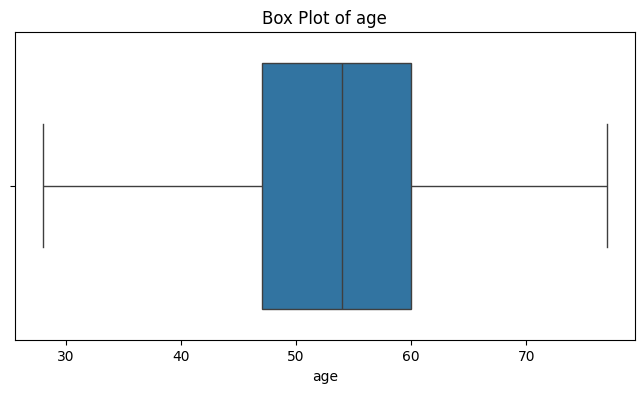


Outliers detected via IQR: 66
IQR Outlier values: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Outliers detected via Z-score: 0


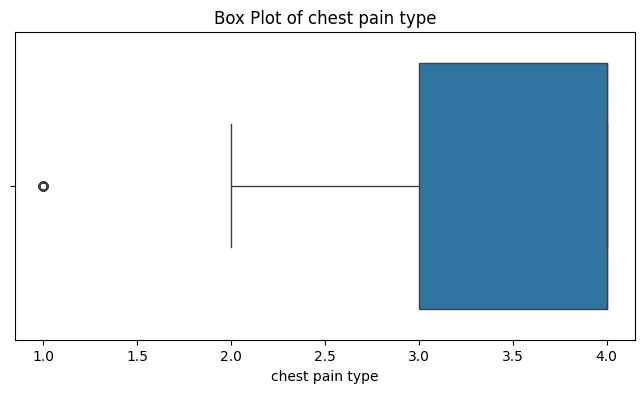


Outliers detected via IQR: 37
IQR Outlier values: [190 180 180 180 200 180 180 180  80 200 185 200 180 180   0 178 172 180
 190 174 178 180 200 192 178 180 180 172 172 180 200 174 178 192 180 178
 180]
Outliers detected via Z-score: 10
Z-score Outlier values: [190 200 200 200   0 190 200 192 200 192]


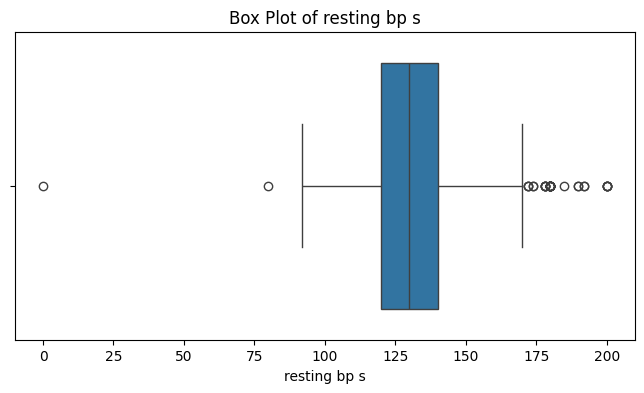


Outliers detected via IQR: 193
IQR Outlier values: [468 518 412 529 466 393 603 404 491 394   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 458   0   0   0
   0   0   0 564 407 417 409 394 417 407 564 394 409]
Outliers detected via Z-score: 5
Z-score Outlier values: [518 529 603 564 564]


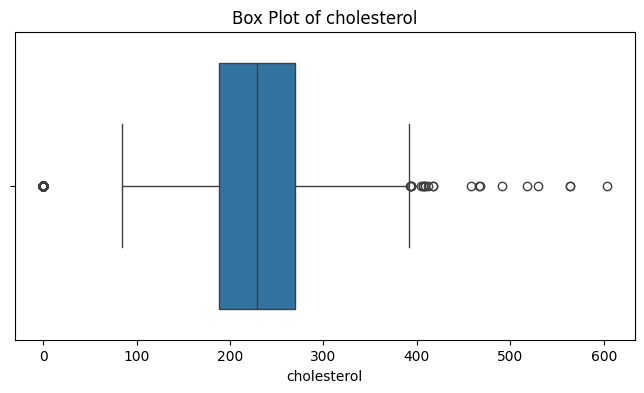


Outliers detected via IQR: 0
Outliers detected via Z-score: 0


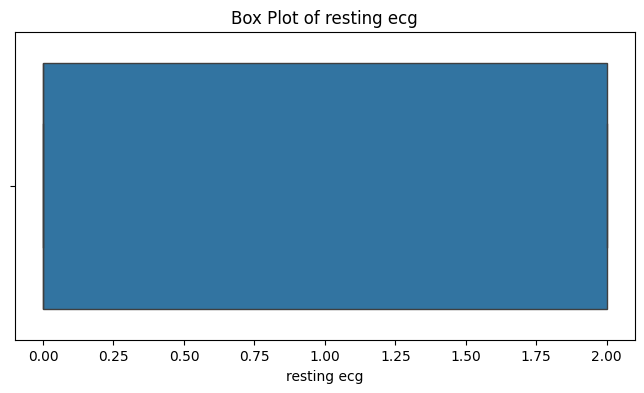


Outliers detected via IQR: 1
IQR Outlier values: [60]
Outliers detected via Z-score: 2
Z-score Outlier values: [63 60]


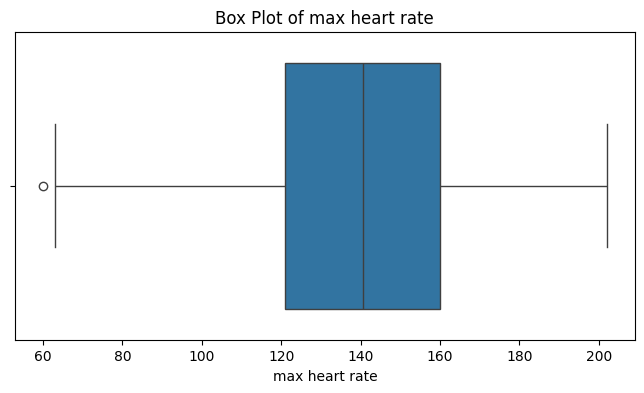


Outliers detected via IQR: 0
Outliers detected via Z-score: 0


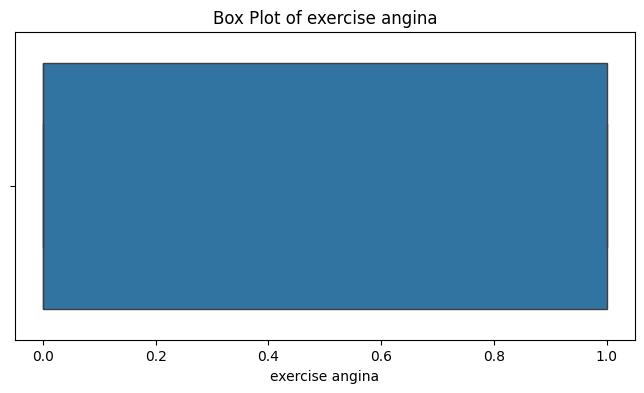


Outliers detected via IQR: 11
IQR Outlier values: [ 5.  -2.6  4.2  5.6  4.2  6.2  6.2  5.6  4.2  4.2  4.4]
Outliers detected via Z-score: 11
Z-score Outlier values: [ 5.  -2.6  4.2  5.6  4.2  6.2  6.2  5.6  4.2  4.2  4.4]


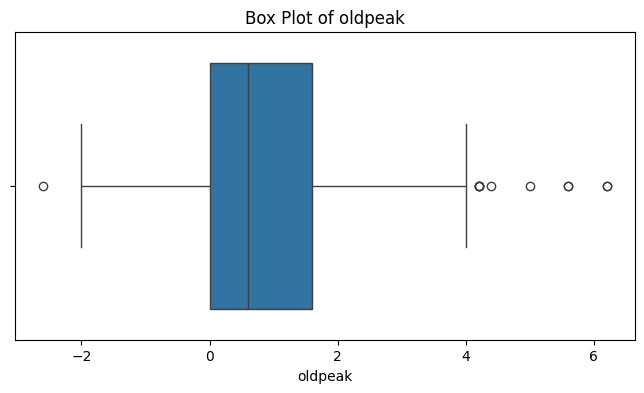


Outliers detected via IQR: 0
Outliers detected via Z-score: 0


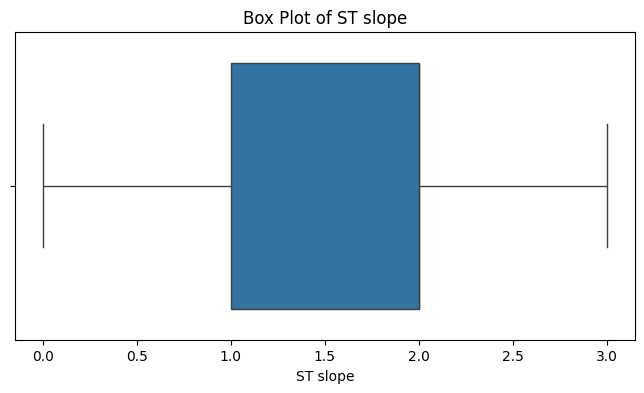

In [104]:
numeric_columns = ['age', 'chest pain type', 'resting bp s', 'cholesterol', 'resting ecg',
                   'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']

for col in numeric_columns:

    # IQR Method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers detected via IQR: {len(outliers_iqr)}")
    if not outliers_iqr.empty:
        print("IQR Outlier values:", outliers_iqr[col].values)

    # Z-Score Method
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    outliers_zscore = df[z_scores > 3]
    print(f"Outliers detected via Z-score: {len(outliers_zscore)}")
    if not outliers_zscore.empty:
        print("Z-score Outlier values:", outliers_zscore[col].values)

    # Box Plot Visualization
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [105]:
# Using IQR to remove outliers
cleaned_df = df.copy()

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out outliers
    cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]

print(f"Original rows: {len(df)}, Cleaned rows: {len(cleaned_df)}")

Original rows: 1190, Cleaned rows: 902


In [106]:
# Split for final evaluation
test_size = 0.2
random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [107]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

# Baseline SVM

In [108]:
# Dictionary to store results
svc_results = {}

# Define and train the model
svm = SVC()
t0 = time.time()
svm.fit(X_train, y_train)
t1 = time.time()

# Predict and store accuracy and time
y_pred = svm.predict(X_test)
svc_results['svm'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'time': t1 - t0
}

# Save the trained model to a file
joblib.dump(svm, 'Base_model.pkl')

# Show results
svc_results


{'svm': {'accuracy': 0.8445378151260504, 'time': 0.0322117805480957}}

# SVM with GridSearch

In [109]:
from sklearn.metrics import accuracy_score
import joblib
import time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 20, 30, 50],
    'gamma': ['scale', 'auto']
}

gridsearch_result = {}

grid = GridSearchCV(SVC(), param_grid, cv=5)
t0 = time.time()
grid.fit(X_train, y_train)
t1 = time.time()
y_pred_grid = grid.predict(X_test)
gridsearch_result['grid'] = {
    'accuracy': accuracy_score(y_test, y_pred_grid),
    'time': t1 - t0
}

# Save best model
joblib.dump(grid.best_estimator_, 'GridSearch_best_model.pkl')

# Print best hyperparameters and accuracy
print("Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)
print("Test Accuracy:", gridsearch_result['grid']['accuracy'])
print("Training Time (s):", gridsearch_result['grid']['time'])


Best Hyperparameters: {'C': 20, 'gamma': 'auto'}
Best Cross-Validation Score: 0.8697161752548912
Test Accuracy: 0.9033613445378151
Training Time (s): 2.3814191818237305


In [110]:
def bfo_optimize(obj_func, bounds, n_bacteria=30, n_chem=15, n_reprod=4, n_elim=2, ped=0.2, step_size=0.05):
    dim = len(bounds)
    pop = np.random.uniform([b[0] for b in bounds], [b[1] for b in bounds], (n_bacteria, dim))
    fitness = np.array([obj_func(p) for p in pop])
    best_sol, best_cost = pop[np.argmin(fitness)].copy(), fitness.min()
    for _ in range(n_elim):
        for _ in range(n_reprod):
            for _ in range(n_chem):
                for i in range(n_bacteria):
                    delta = np.random.randn(dim); delta /= np.linalg.norm(delta)
                    cand = np.clip(pop[i] + step_size * delta,
                                   [b[0] for b in bounds], [b[1] for b in bounds])
                    cost = obj_func(cand)
                    if cost < fitness[i]: pop[i], fitness[i] = cand, cost
                    if cost < best_cost: best_sol, best_cost = cand.copy(), cost
            # reproduction
            idx = np.argsort(fitness)
            pop = np.vstack((pop[idx[:n_bacteria//2]],)*2)
            fitness = np.hstack((fitness[idx[:n_bacteria//2]],)*2)
        # dispersal
        for i in range(n_bacteria):
            if np.random.rand() < ped:
                new_pos = np.random.uniform([b[0] for b in bounds],[b[1] for b in bounds])
                pop[i] = new_pos; fitness[i] = obj_func(new_pos)
                if fitness[i] < best_cost: best_sol, best_cost = new_pos.copy(), fitness[i]
    return best_sol, best_cost

In [111]:
def aco_optimize(obj_func, bounds, n_ants=30, n_best=5, n_iter=50, decay=0.1):
    dim = len(bounds)
    lb = np.array([b[0] for b in bounds])
    ub = np.array([b[1] for b in bounds])
    # Initialize pheromones (solutions)
    pheromone = np.random.uniform(lb, ub, (n_ants, dim))
    fitness = np.array([obj_func(sol) for sol in pheromone])
    best = pheromone[np.argmin(fitness)].copy()
    best_cost = fitness.min()

    for _ in range(n_iter):
        idx = np.argsort(fitness)
        top_ants = pheromone[idx[:n_best]]
        # Evaporation
        pheromone *= (1 - decay)
        # Deposit from best ants
        for ant in top_ants:
            pheromone += decay * ant
        # Generate new solutions
        new_pher = []
        for i in range(n_ants):
            mean = pheromone[i] / n_best
            var = (ub - lb) ** 2
            sol = np.clip(np.random.normal(mean, np.sqrt(var)), lb, ub)
            new_pher.append(sol)
        pheromone = np.array(new_pher)
        fitness = np.array([obj_func(sol) for sol in pheromone])
        curr_best = pheromone[np.argmin(fitness)].copy()
        curr_cost = fitness.min()
        if curr_cost < best_cost:
            best_cost = curr_cost
            best = curr_best.copy()
    return best, best_cost

In [112]:
def de_optimize(obj_func, bounds, pop_size=30, F=0.8, CR=0.7, n_gen=50):
    dim = len(bounds)
    lb = np.array([b[0] for b in bounds]); ub = np.array([b[1] for b in bounds])
    pop = np.random.uniform(lb, ub, (pop_size, dim))
    fitness = np.array([obj_func(ind) for ind in pop])
    for _ in range(n_gen):
        for i in range(pop_size):
            idxs = [idx for idx in range(pop_size) if idx != i]
            a, b, c = pop[np.random.choice(idxs, 3, replace=False)]
            mutant = np.clip(a + F*(b - c), lb, ub)
            cross = np.random.rand(dim) < CR
            trial = np.where(cross, mutant, pop[i])
            f = obj_func(trial)
            if f < fitness[i]: pop[i], fitness[i] = trial, f
    best = pop[np.argmin(fitness)]; return best, fitness.min()


In [113]:
def ga_optimize(obj_func, bounds, pop_size=30, n_gen=50, cx_pb=0.8, mut_pb=0.2):
    dim = len(bounds)
    lb = np.array([b[0] for b in bounds]); ub = np.array([b[1] for b in bounds])
    pop = np.random.uniform(lb, ub, (pop_size, dim))
    fitness = np.array([obj_func(ind) for ind in pop])
    for _ in range(n_gen):
        # selection (tournament)
        idx = np.random.randint(0, pop_size, (pop_size, 2))
        winners = [pop[a] if fitness[a]<fitness[b] else pop[b] for a,b in idx]
        # crossover
        children = []
        for i in range(0, pop_size, 2):
            p1, p2 = winners[i], winners[i+1]
            if np.random.rand() < cx_pb:
                pt = np.random.randint(1, dim)
                c1 = np.concatenate((p1[:pt], p2[pt:])); c2 = np.concatenate((p2[:pt], p1[pt:]))
            else: c1, c2 = p1.copy(), p2.copy()
            children += [c1, c2]
        # mutation
        pop = np.array([np.clip(ind + mut_pb*np.random.randn(dim), lb, ub) for ind in children])
        fitness = np.array([obj_func(ind) for ind in pop])
    best = pop[np.argmin(fitness)]; return best, fitness.min()


In [114]:
def abc_optimize(obj_func, bounds, n_food=30, n_iter=50, limit=10):
    dim = len(bounds)
    lb = np.array([b[0] for b in bounds]); ub = np.array([b[1] for b in bounds])
    foods = np.random.uniform(lb, ub, (n_food, dim))
    fitness = np.array([obj_func(f) for f in foods])
    trial = np.zeros(n_food)
    for _ in range(n_iter):
        # employed bees
        for i in range(n_food):
            k = np.random.choice([j for j in range(n_food) if j!=i])
            phi = np.random.randn(dim)
            cand = np.clip(foods[i] + phi*(foods[i]-foods[k]), lb, ub)
            f = obj_func(cand)
            if f < fitness[i]: foods[i], fitness[i] = cand, f; trial[i]=0
            else: trial[i]+=1
        # onlooker bees
        prob = (1/fitness) / np.sum(1/fitness)  
        for _ in range(n_food):
            i = np.random.choice(range(n_food), p=prob)
            k = np.random.choice([j for j in range(n_food) if j!=i])
            phi = np.random.randn(dim)
            cand = np.clip(foods[i] + phi*(foods[i]-foods[k]), lb, ub)
            f = obj_func(cand)
            if f < fitness[i]: foods[i], fitness[i], trial[i] = cand, f, 0
            else: trial[i]+=1
        # scout bees
        for i in range(n_food):
            if trial[i] > limit:
                foods[i] = np.random.uniform(lb, ub)
                fitness[i] = obj_func(foods[i]); trial[i]=0
    best = foods[np.argmin(fitness)]; return best, fitness.min()

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

# Define discrete sets
C_values = [0.1, 1, 10, 20, 30, 50]
gamma_values = ['scale', 'auto']

# Objective function using index-based access
def objective(params):
    C_idx, gamma_idx = params
    C = C_values[int(C_idx)]
    gamma = gamma_values[int(gamma_idx)]
    
    svc = SVC(C=C, gamma=gamma)
    score = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy').mean()
    return -score  

# Bounds for index-based search (e.g., with differential evolution)
bounds = [(0, len(C_values) - 1), (0, len(gamma_values) - 1)]


In [116]:
methods = [bfo_optimize, aco_optimize, de_optimize, ga_optimize, abc_optimize]
results = {}
t0_total = time.time()
for method in methods:
    t0 = time.time()
    params, cost = method(objective, bounds)
    t1 = time.time()
    C_opt, gamma_opt = params[0],params[1]
    results[method.__name__] = {'C':C_opt, 'gamma':gamma_opt, 'CV acc':-cost, 'time':t1-t0}
t1_total = time.time()

In [117]:
for name, res in results.items():
    print(f"{name}: C={res['C']:.4f}, gamma={res['gamma']:.6f}, CV acc={res['CV acc']:.4f}, time={res['time']:.2f}s")

bfo_optimize: C=3.3451, gamma=0.493304, CV acc=0.8687, time=670.82s
aco_optimize: C=3.0900, gamma=1.000000, CV acc=0.8697, time=273.77s
de_optimize: C=3.3635, gamma=1.000000, CV acc=0.8697, time=276.43s
ga_optimize: C=3.3605, gamma=1.000000, CV acc=0.8697, time=279.94s
abc_optimize: C=3.7610, gamma=1.000000, CV acc=0.8697, time=575.78s


In [118]:
best_method = max(results, key=lambda k: results[k]['CV acc'])
bm = results[best_method]
svc = SVC(C=bm['C'], gamma=bm['gamma'])
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"\nBest: {best_method} → Test accuracy={accuracy_score(y_test,y_pred):.4f}")


Best: aco_optimize → Test accuracy=0.8655


In [134]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time
import joblib

# Dictionary to store results
svc_results = {}
# Dictionary mapping algorithm names to their respective parameters
param_dict = {
    "bfo_optimize": {"C": 3.3451, "gamma": 0.493304},
    "aco_optimize": {"C": 3.0900, "gamma": 1.000000},
    "de_optimize":  {"C": 3.3635, "gamma": 1.000000},
    "ga_optimize":  {"C": 3.3605, "gamma": 1.000000},
    "abc_optimize": {"C": 3.7610, "gamma": 1.000000},
}

# Train and save a model for each set of parameters
for algo_name, params in param_dict.items():
    svm = SVC(C=params["C"], gamma=params["gamma"])
    
    t0 = time.time()
    svm.fit(X_train, y_train)
    t1 = time.time()

    y_pred = svm.predict(X_test)
    svc_results[algo_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'time': t1 - t0
    }

    # Save the trained model with a filename matching the algorithm name
    model_filename = f"Models/{algo_name}_svm_model.pkl"
    joblib.dump(svm, model_filename)

# Show results
svc_results


{'bfo_optimize': {'accuracy': 0.8907563025210085, 'time': 0.07120776176452637},
 'aco_optimize': {'accuracy': 0.865546218487395, 'time': 0.050750732421875},
 'de_optimize': {'accuracy': 0.865546218487395, 'time': 0.04684901237487793},
 'ga_optimize': {'accuracy': 0.865546218487395, 'time': 0.05623960494995117},
 'abc_optimize': {'accuracy': 0.865546218487395, 'time': 0.05033302307128906}}

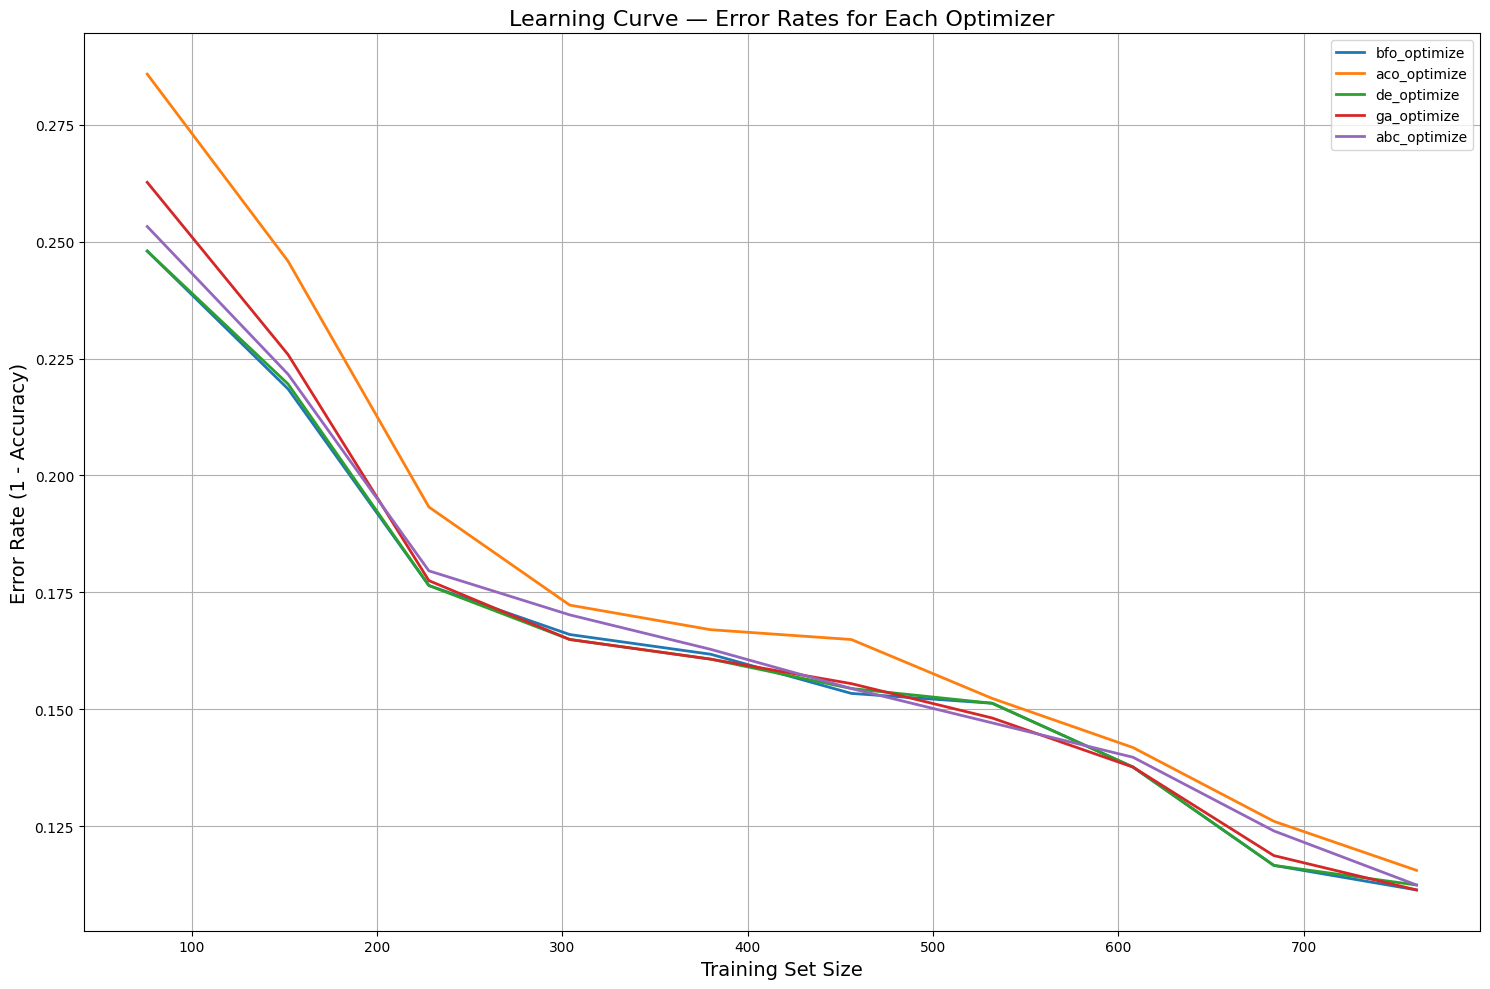

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

# Parameter dictionary
param_dict = {
    "bfo_optimize": {"C": 0.9956, "gamma": 0.496041},
    "aco_optimize": {"C": 0.8732, "gamma": 0.544498},
    "de_optimize":  {"C": 0.9847, "gamma": 0.494071},
    "ga_optimize":  {"C": 0.9828, "gamma": 0.514154},
    "abc_optimize": {"C": 1.1399, "gamma": 0.537628},
}

# Plot setup
plt.figure(figsize=(15, 10))

# Loop through each optimizer
for i, (algo_name, params) in enumerate(param_dict.items()):
    model = SVC(C=params['C'], gamma=params['gamma'])

    # Generate learning curve data
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    # Calculate error rates
    train_errors = 1 - np.mean(train_scores, axis=1)
    test_errors = 1 - np.mean(test_scores, axis=1)

    # Plotting
    plt.plot(train_sizes, test_errors, label=f'{algo_name}', linewidth=2)

# Plot formatting
plt.title('Learning Curve — Error Rates for Each Optimizer', fontsize=16)
plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('Error Rate (1 - Accuracy)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


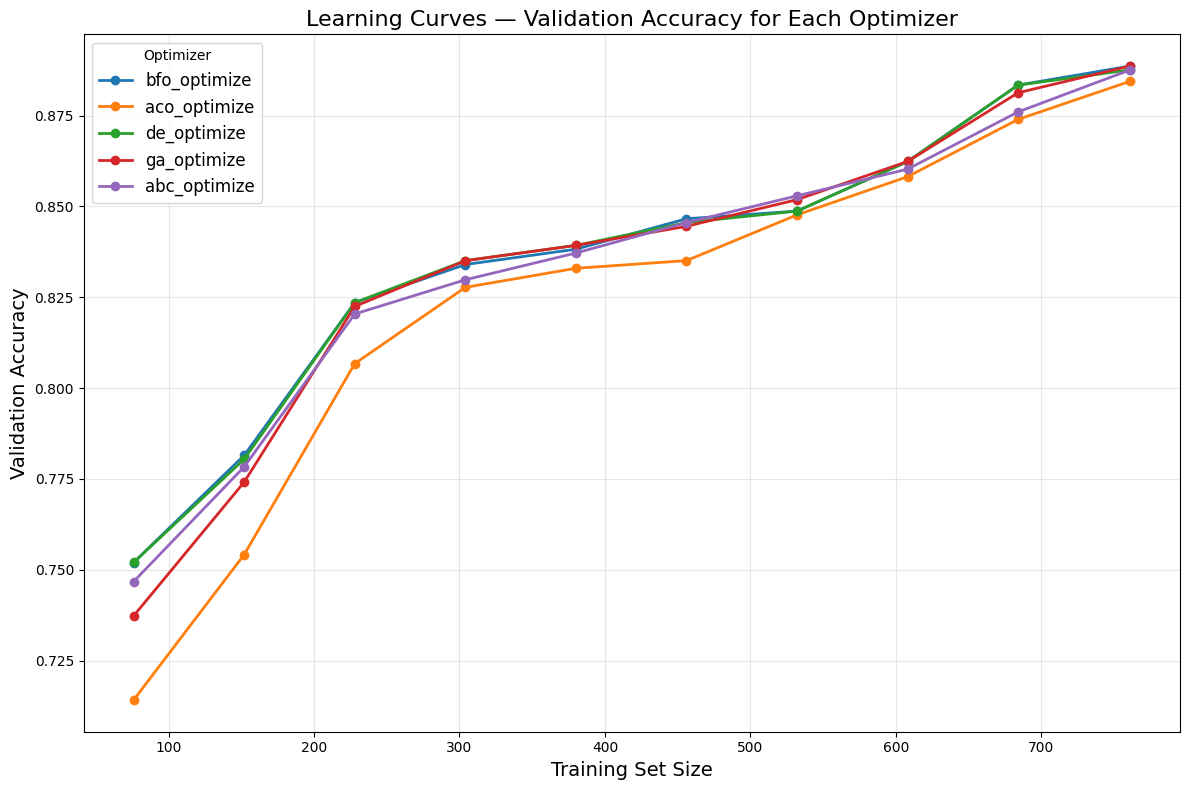

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

# Parameter dictionary
param_dict = {
    "bfo_optimize": {"C": 0.9956, "gamma": 0.496041},
    "aco_optimize": {"C": 0.8732, "gamma": 0.544498},
    "de_optimize":  {"C": 0.9847, "gamma": 0.494071},
    "ga_optimize":  {"C": 0.9828, "gamma": 0.514154},
    "abc_optimize": {"C": 1.1399, "gamma": 0.537628},
}

plt.figure(figsize=(12, 8))

for algo_name, params in param_dict.items():
    svc = SVC(C=params['C'], gamma=params['gamma'])

    # learning_curve returns train_scores and test_scores (accuracy by fold)
    train_sizes, train_scores, test_scores = learning_curve(
        svc, X_train, y_train,
        cv=5,
        scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    # mean validation accuracy across folds
    test_mean_acc = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, test_mean_acc,
             label=algo_name,
             linewidth=2,
             marker='o')

plt.title('Learning Curves — Validation Accuracy for Each Optimizer', fontsize=16)
plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('Validation Accuracy', fontsize=14)
plt.legend(title='Optimizer', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [128]:
svc_best = svc
train_sizes, train_scores, val_scores = learning_curve(
    svc_best, X_train, y_train, cv=5, train_sizes=np.linspace(0.1,1.0,10), scoring='accuracy'
)

train_err = 1 - np.mean(train_scores,axis=1)
val_err = 1 - np.mean(val_scores,axis=1)

In [131]:
new_patient = {
    'age': 48,
    'sex': 0,
    'chest pain type': 4,
    'resting bp s': 138,
    'cholesterol': 214,
    'fasting blood sugar': 0,
    'resting ecg': 0,
    'max heart rate': 108,
    'exercise angina': 1,
    'oldpeak': 1.5,
    'ST slope': 2
}
new_df = pd.DataFrame([new_patient])

loaded_scaler = joblib.load('scaler.pkl')
new_X = loaded_scaler.transform(new_df.values)
# Load the model
loaded_model = joblib.load('aco_optimize_svm_model.pkl')
# Predict
prediction = loaded_model.predict(new_X)
print(f"Predicted class for new patient: {prediction[0]}")

Predicted class for new patient: 1
